In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings; warnings.simplefilter('ignore', FutureWarning)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'
import pandas as pd
from avian_vocalizations.data import load_data, get_melsg_array, get_mfcc_array

In [3]:
data_dir = 'data'
index_df, shapes_df, train_df, test_df = load_data(data_dir)

In [4]:
index_df.head(3)

Unnamed: 0        country  duration_seconds   english_cname  \
file_id                                                                
17804             0  United States                 3  Abert's Towhee   
177367            1  United States                 4  Abert's Towhee   
145505            2  United States                 4  Abert's Towhee   

            file_name                                    file_url     genus  \
file_id                                                                       
17804     XC17804.mp3   https://www.xeno-canto.org/17804/download  Melozone   
177367   XC177367.mp3  https://www.xeno-canto.org/177367/download  Melozone   
145505   XC145505.mp3  https://www.xeno-canto.org/145505/download  Melozone   

         latitude                                            license  \
file_id                                                                
17804     33.3117  http://creativecommons.org/licenses/by-nc-nd/2.5/   
177367    34.2850  http://creativecommons.org/licenses/by-nc-sa/4.0/   
145505    34.2850  http://creativecommons.org/licenses/by-nc-sa/3.0/   

                                                  location  ...  \
file_id                                                     ...   
17804    Cibola National Wildlife Refuge, Cibola, Arizo...  ...   
177367     Bill Williams River NWR, Arizona, United States  ...   
145505     Bill Williams River NWR, Arizona, United States  ...   

                                             recordist_url  \
file_id                                                      
17804    https://www.xeno-canto.org/contributor/EKKJJJRDJY   
177367   https://www.xeno-canto.org/contributor/YQNGFTBRRT   
145505   https://www.xeno-canto.org/contributor/YQNGFTBRRT   

                                              sonogram_url species  \
file_id                                                              
17804    https://www.xeno-canto.org/sounds/uploaded/EKK...  aberti   
177367   https://www.xeno-canto.org/sounds/uploaded/YQN...  aberti   
145505   https://www.xeno-canto.org/sounds/uploaded/YQN...  aberti   

                type                                            remarks  \
file_id                                                                   
17804    'seet' call  XC17804 © Nathan Pieplow // Cibola National Wi...   
177367          call  XC177367 © Lauren Harter // Bill Williams Rive...   
145505   Squeal duet  XC145505 © Lauren Harter // Bill Williams Rive...   

                                           full_name n_frames   test  \
file_id                                                                
17804               Abert's Towhee (Melozone aberti)      130  False   
177367   Abert's Towhee (Melozone aberti dumeticola)      190  False   
145505   Abert's Towhee (Melozone aberti dumeticola)      181  False   

                               melspectrogram_path  \
file_id                                              
17804     data/features/XC17804_melspectrogram.dat   
177367   data/features/XC177367_melspectrogram.dat   
145505   data/features/XC145505_melspectrogram.dat   

                               mfcc_path  
file_id                                   
17804     data/features/XC17804_mfcc.dat  
177367   data/features/XC177367_mfcc.dat  
145505   data/features/XC145505_mfcc.dat  

[3 rows x 22 columns]

The dataset contains 91 distinct species labels.
2730 mp3s found in /home/sam/Downloads/avian_vocalizations/data/audio/


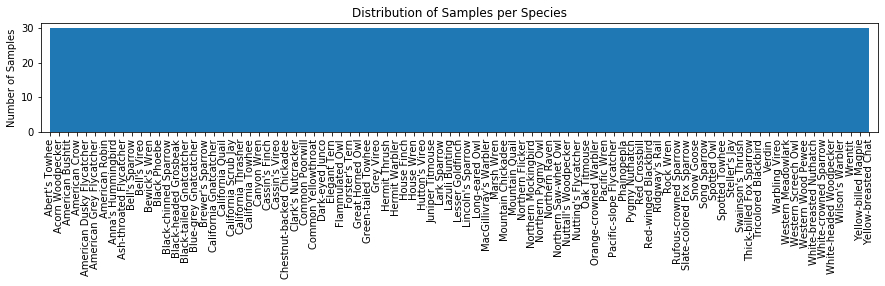

In [5]:
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
from glob import glob
import os

label_encoder = LabelEncoder().fit(index_df['english_cname'] )
n_classes = len(label_encoder.classes_)
print("The dataset contains %i distinct species labels."%n_classes)
mp3_dir = os.path.join(data_dir,'audio')
print("%i mp3s found in %s/"%(len(glob(os.path.join(mp3_dir,'*.mp3'))), os.path.abspath(mp3_dir)))

y_encoded_entire_dataset = np.array(label_encoder.transform(index_df['english_cname']))
plt.figure(figsize=(15,2)); plt.title("Distribution of Samples per Species")
plt.hist(y_encoded_entire_dataset, bins=91 ); plt.xlim(-1,91)
plt.ylabel("Number of Samples")
plt.xticks(range(n_classes), label_encoder.classes_, rotation='vertical')
plt.show();

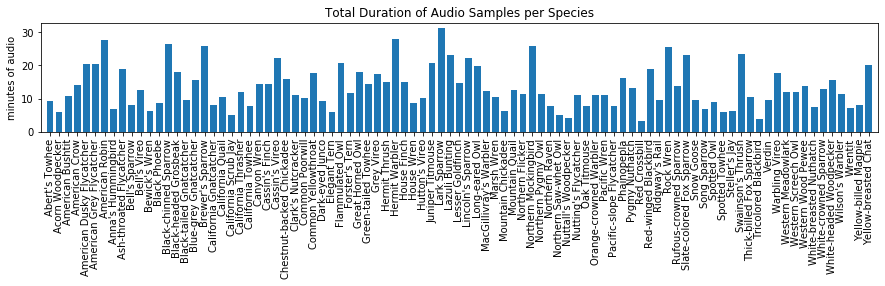

In [6]:
duration_by_class=[index_df.loc[index_df.english_cname==y,'duration_seconds'].sum()/60 
                   for y in label_encoder.classes_]
plt.figure(figsize=(15,2))
plt.title("Total Duration of Audio Samples per Species")
plt.bar(range(n_classes), duration_by_class, .75)
plt.ylabel("minutes of audio")
plt.xticks(range(n_classes), label_encoder.classes_, rotation='vertical')
plt.xlim(-1,91)
plt.show();

/home/sam/Downloads/avian_vocalizations/.env/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


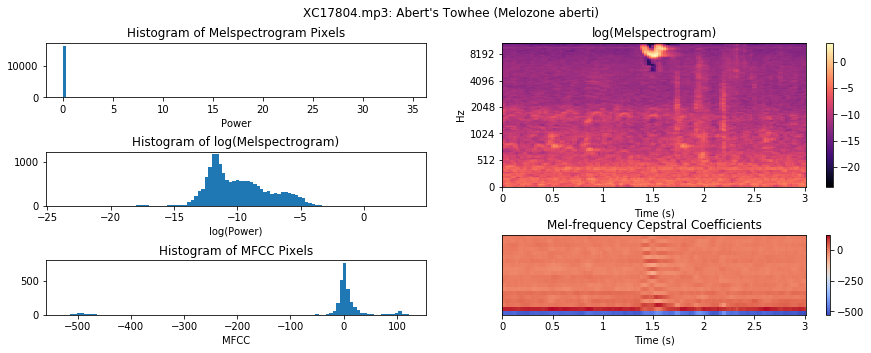

In [7]:
from avian_vocalizations.visualization import vis_sample_with_histograms
    
vis_sample_with_histograms(index_df.iloc[0]);

XC119222.mp3: Abert's Towhee (Melozone aberti), contributed by: Ryan P. O'Donnell https://www.xeno-canto.org/contributor/SDXVTLDNGJ


/home/sam/Downloads/avian_vocalizations/.env/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/home/sam/Downloads/avian_vocalizations/.env/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


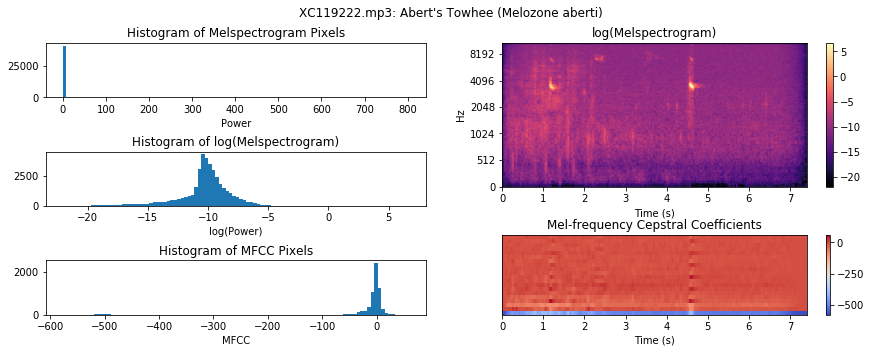

XC79575.mp3: American Grey Flycatcher (Empidonax wrightii), contributed by: Ryan P. O'Donnell https://www.xeno-canto.org/contributor/SDXVTLDNGJ


/home/sam/Downloads/avian_vocalizations/.env/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/home/sam/Downloads/avian_vocalizations/.env/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


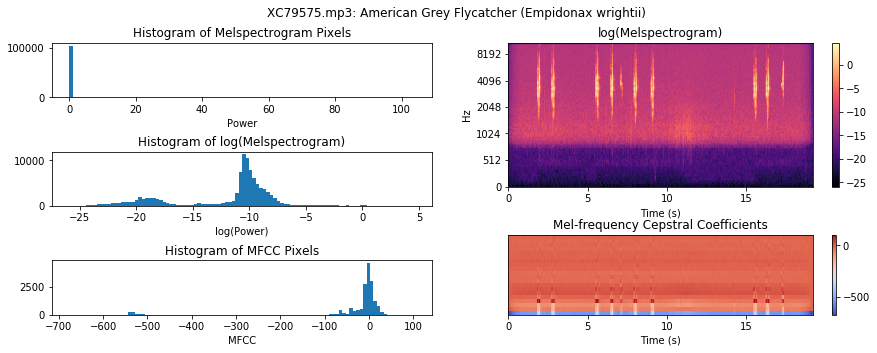

XC79577.mp3: Ash-throated Flycatcher (Myiarchus cinerascens cinerascens), contributed by: Ryan P. O'Donnell https://www.xeno-canto.org/contributor/SDXVTLDNGJ


/home/sam/Downloads/avian_vocalizations/.env/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


/home/sam/Downloads/avian_vocalizations/.env/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


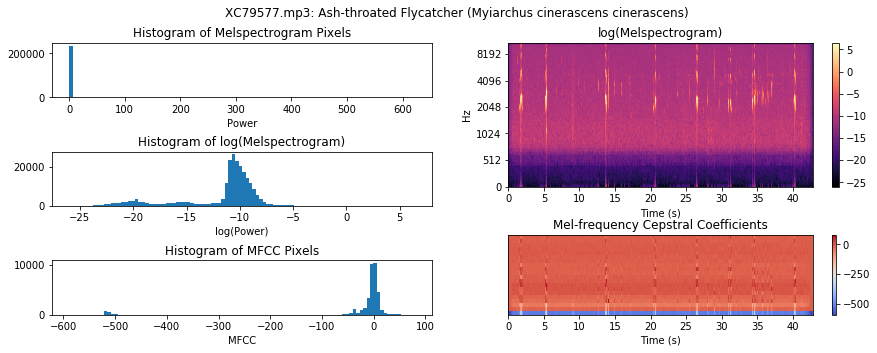

In [8]:
from itertools import islice
import librosa
from IPython.display import Audio

ryans_samples=index_df[index_df.recordist.str.contains('O\'Donnel')]
for i,sample in islice(ryans_samples.iterrows(),0,3):
    print("%s: %s, contributed by: %s %s"%(
        sample.file_name,sample.full_name,sample.recordist,sample.recordist_url))
    data, samplerate = librosa.load(os.path.join(data_dir,'audio',sample.file_name))
    display(Audio(data, rate=samplerate))
    vis_sample_with_histograms(sample)

In [10]:
from sklearn.preprocessing import StandardScaler
from avian_vocalizations.data import log_clipped

melsg_scaler = StandardScaler()
melsg_log_scaler = StandardScaler()
mfcc_scaler = StandardScaler()
scaler_params='data/scaler_params.csv'

if not os.path.exists(scaler_params):
    for i, file_id in enumerate(index_df.index):
        print("\rReading melsg %i/%i (%.1f%%)"%(i+1,len(index_df),100*(i+1)/len(index_df)), end="")
        melsg = get_melsg_array(index_df, file_id).flatten()
        melsg_scaler.partial_fit(melsg.reshape(-1,1))
        melsg_log_scaler = melsg_log_scaler.partial_fit(log_clipped(melsg).reshape(-1,1))

    for i, file_id in enumerate(index_df.index):
        print("\rReading mfcc %i/%i (%.1f%%)"%(i+1,len(index_df),100*(i+1)/len(index_df)), end="")
        mfcc = get_mfcc_array(index_df, file_id).flatten()
        mfcc_scaler.partial_fit(mfcc.reshape(-1,1)) 
    
    with open(scaler_params,'w') as f:
        def write_scaler_params(name,scaler):
            f.write("%s,%i,%f,%f\n"%(name, scaler.n_samples_seen_, scaler.mean_, scaler.var_))
        f.write("dataset_name,total_pixels,mean,variance\n")
        write_scaler_params("melsg",melsg_scaler)
        write_scaler_params("melsg_log",melsg_log_scaler)
        write_scaler_params("mfcc",mfcc_scaler)
    print("\nMean pixel data saved to %s."%scaler_params)
    
else: # Load cached scaler params
    print("Loading scaler params from %s."%scaler_params)
    scalers_df = pd.read_csv(scaler_params, index_col=0)
    def load_scaler_params(name, scaler):
        scaler.n_samples_seen_ = scalers_df.loc[name, 'total_pixels']
        scaler.mean_ = scalers_df.loc[name, 'mean']
        scaler.var_ = scalers_df.loc[name, 'variance']
        scaler.scale_ = np.sqrt(scalers_df.loc[name, 'variance'])
    load_scaler_params("melsg",melsg_scaler)
    load_scaler_params("melsg_log",melsg_log_scaler)
    load_scaler_params("mfcc",mfcc_scaler)
    
print("Mel spectrogram      Total pixels: %i, mean: %.5f, std. dev: %.5f"%(
      melsg_scaler.n_samples_seen_, melsg_scaler.mean_, np.sqrt(melsg_scaler.var_)))
print("log(mel-spectrogram) Total Pixels: %i, mean: %.5f, std. dev: %.5f"%(
      melsg_log_scaler.n_samples_seen_, melsg_log_scaler.mean_, np.sqrt(melsg_log_scaler.var_)))
print("MFCC                 Total pixels: %i, mean: %.5f, std. dev: %.5f"%(
      mfcc_scaler.n_samples_seen_, mfcc_scaler.mean_, np.sqrt(mfcc_scaler.var_))) 

Loading scaler params from data/scaler_params.csv.
Mel spectrogram      Total pixels: 412313856, mean: 0.29080, std. dev: 15.13515
log(mel-spectrogram) Total Pixels: 412313856, mean: -7.34926, std. dev: 3.56474
MFCC                 Total pixels: 64424040, mean: -19.00330, std. dev: 86.45496


In [11]:
X_train = index_df.loc[index_df['test']==False].index.values
y_train = label_encoder.transform(index_df.loc[index_df['test']==False,"english_cname"].values)

In [12]:
import keras
from keras.utils import to_categorical
import sys
# https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly
class AudioFeatureGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_file_ids, labels, batch_size, n_frames=128, n_channels=1,
                 shuffle=False, seed=37, n_classes=None, verbose=False):
        'Initialization'
        self.n_frames = n_frames
#         self.dim = (128, self.n_frames)
        self.batch_size = batch_size
        self.n_batches = np.ceil(len(list_file_ids)/batch_size)
        self.n_classes = n_classes if n_classes else labels.max()-labels.min()+1
        self.labels_by_id = {list_file_ids[i]:l for i,l in enumerate(labels)}
        self.list_file_ids = list_file_ids
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.seed = seed
        self.verbose = verbose
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_file_ids) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        list_file_ids_temp = [self.list_file_ids[k] for k in indexes]
        X, y = self.__data_generation(list_file_ids_temp, index)
        return X, y

    def on_epoch_end(self):
        'Update indexes, to be called after each epoch'
        self.indexes = np.arange(len(self.list_file_ids))
        if self.shuffle == True:
            np.random.seed(self.seed)
            self.seed = self.seed+1 # increment the seed so we get a different batch.
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_file_ids_temp, batch_index):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        melsg_arr = np.empty((self.batch_size, 128, self.n_frames, self.n_channels))
        mfcc_arr = np.empty((self.batch_size, 20, self.n_frames, self.n_channels))
        #X = np.empty((self.batch_size, 128+20, self.n_frames, self.n_channels))
        y = np.empty((self.batch_size, self.n_classes), dtype=int) # one-hot encoded labels
        offsets = np.empty(self.batch_size)

        for i, file_id in enumerate(list_file_ids_temp):
            melsg = get_melsg_array(index_df, file_id)
            melsg_lognorm = melsg_log_scaler.transform(log_clipped(melsg))
        
            mfcc = get_mfcc_array(index_df, file_id)
            mfcc = mfcc_scaler.transform(mfcc)
            
            # Pick a random window from the sound file
            d_len = mfcc.shape[1] - self.n_frames
            if d_len<0: # Clip is shorter than window, so pad with mean value.
                n = int(np.random.uniform(0, -d_len))
                pad_range = (n, -d_len-n) # pad with n values on the left, clip_length - n values on the right 
#                 melsg_cropped = np.pad(melsg, ((0,0), pad_range), 'constant', constant_values=melsg.mean())
                melsg_lognorm_cropped = np.pad(melsg_lognorm, ((0,0), pad_range), 'constant', constant_values=0)
                mfcc_cropped = np.pad(mfcc, ((0,0), pad_range), 'constant', constant_values=0)
            else: # Clip is longer than window, so slice it up
                n = int(np.random.uniform(0, d_len))
#                 melsg_cropped = melsg[:, n:(n+self.n_frames)]
                melsg_lognorm_cropped = melsg_lognorm[:, n:(n+self.n_frames)]
                mfcc_cropped = mfcc[:, n:(n+self.n_frames)]
            offsets[i,] = n
            melsg_arr[i,] = melsg_lognorm_cropped.reshape(1,128,self.n_frames,1)
            mfcc_arr[i,] = mfcc_cropped.reshape(1,20,self.n_frames,1)
            y[i,] = to_categorical(self.labels_by_id[file_id], num_classes=self.n_classes)

#         print("Generated batch with input shapes ",(melsg_arr.shape, mfcc_arr.shape))
        if self.verbose:
            print("Generated batch #%i/%i."%(batch_index+1,self.n_batches))
            sys.stdout.flush()
        return {'melsg':melsg_arr, 
                'mfcc':mfcc_arr, 
                'id':list_file_ids_temp,
                'offset':offsets,
               }, y

Using TensorFlow backend.


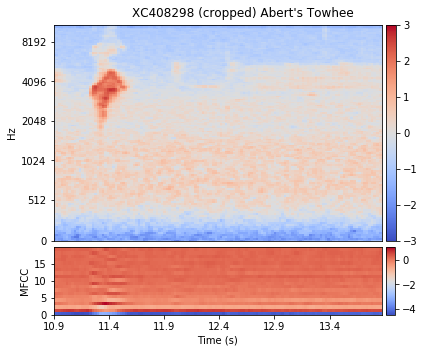

data/audio/XC408298.mp3


/home/sam/Downloads/avian_vocalizations/.env/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


In [13]:
from avian_vocalizations.visualization import show_sample

generator = AudioFeatureGenerator(X_train, y_train, 
            batch_size=3, shuffle=False, seed=37, n_frames=128)
Xs, ys = generator[31] 
for i in range(ys.shape[0])[-1:]: #for each of the samples in the batch)
    label = label_encoder.classes_[ys[i]][0]
    show_sample(Xs['melsg'][i], Xs['mfcc'][i], file_id=Xs['id'][i], 
                label='(cropped) '+label, offset=Xs['offset'][i],
                load_clip=True )

In [14]:
from keras.models import Model, Sequential
from keras.layers import MaxPooling2D, Conv2D, GlobalAveragePooling2D, \
                         Dropout, Dense, Input, Concatenate, Flatten

melsg_input = Input(shape=(128,128,1),name='melsg')
melsg_pathway = Conv2D(16,3,name='melsg_conv2d_1',
                     padding='same',activation="relu")(melsg_input)
melsg_pathway = MaxPooling2D(pool_size=3,name='melsg_maxpooling_1')(melsg_pathway)
melsg_pathway = Dropout(rate=.2,name='melsg_dropout_1')(melsg_pathway)
melsg_pathway = Conv2D(32,3,padding='same',activation="relu", 
                     name='melsg_conv2d_2')(melsg_pathway)
melsg_pathway = MaxPooling2D(pool_size=3,name='melsg_maxpooling_2')(melsg_pathway)
melsg_pathway = Dropout(rate=.2, name='melsg_dropout_2')(melsg_pathway)
melsg_pathway = Conv2D(64,3,padding='same',activation="relu", 
                     name='melsg_conv2d_3')(melsg_pathway)
melsg_pathway = MaxPooling2D(pool_size=2,name='melsg_maxpooling_3')(melsg_pathway)
melsg_pathway = Dropout(rate=.2,name='melsg_dropout_3')(melsg_pathway)
# melsg_pathway = GlobalAveragePooling2D(name='melsg_globalaverage2d')(melsg_pathway)
melsg_pathway = Flatten()(melsg_pathway)

mfcc_input = Input(shape=(20,128,1),name='mfcc')
# Each filter is 20 high, for each of the 20 coefficients (MFCCs)
mfcc_pathway = Conv2D(64,[20,2],padding='same',
                      name='mfcc_conv2d_1',activation="relu")(mfcc_input)
mfcc_pathway = MaxPooling2D(pool_size=[1,3],name='mfcc_maxpooling_1')(mfcc_pathway) 
                        # output shape (20, 42, 16)
mfcc_pathway = Dropout(rate=.2,name='mfcc_dropout_1')(mfcc_pathway)
mfcc_pathway = Conv2D(32,[20,1],padding='same',activation="relu",
                      name='mfcc_conv2d_2')(mfcc_pathway)
mfcc_pathway = MaxPooling2D(pool_size=[1,3],name='mfcc_maxpooling_2')(mfcc_pathway) 
                        # output shape ( 20, 14, 32 )
mfcc_pathway = Dropout(rate=.2,name='mfcc_drouout_2')(mfcc_pathway)
mfcc_pathway = Conv2D(64,[20,1],padding='same',name='mfcc_conv2d_3',
                      activation="relu")(mfcc_pathway)
mfcc_pathway = MaxPooling2D(pool_size=[1,2],name='mfcc_maxpooling_3')(mfcc_pathway)
                        # output shape( 20, 7, 32 )
mfcc_pathway = Dropout(rate=.2,name='mfcc_dropout_3')(mfcc_pathway)
# mfcc_pathway = GlobalAveragePooling2D(name='mfcc_globalaverage2d',)(mfcc_pathway)
mfcc_pathway = Flatten()(mfcc_pathway)

joined = Concatenate(axis=-1,name='joint1')([melsg_pathway, mfcc_pathway])
joined = Dense(16, name='joined_dense1', activation='relu')(joined)
joined = Dense(32, name='joined_dense2', activation='relu')(joined)
joined = Dense(n_classes, activation='softmax', name='joined_output')(joined)

model = Model([melsg_input, mfcc_input], joined)
# model = Model(joined)
# def filter_lines(filter_str):
#     def filter_func(line):
#         if line.find(filter_str)>=0:
#             print(line)
#     return filter_func
# model.summary(print_fn=filter_lines('melsg'))
# model.summary(print_fn=filter_lines('mfcc'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
melsg (InputLayer)              (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
mfcc (InputLayer)               (None, 20, 128, 1)   0                                            
__________________________________________________________________________________________________
melsg_conv2d_1 (Conv2D)         (None, 128, 128, 16) 160         melsg[0][0]                      
__________________________________________________________________________________________________
mfcc_conv2d_1 (Conv2D)          (None, 20, 128, 64)  2624        mfcc[0][0]             

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from keras.callbacks import ModelCheckpoint

output_dir = 'output'
n_splits = 1
n_epochs = 1
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=1/4, random_state=37)
scores = []
params = {'n_frames': 128,
          'n_classes': n_classes,
          'n_channels': 1}
for cv_train_index, cv_val_index in sss.split(X_train, y_train):
    training_generator = AudioFeatureGenerator(
        [X_train[i] for i in cv_train_index], 
        [y_train[i] for i in cv_train_index], 
        batch_size=64, shuffle=True, seed=37, **params)
    validation_generator = AudioFeatureGenerator(
        [X_train[i] for i in cv_val_index], 
        [y_train[i] for i in cv_val_index], 
        batch_size=64, **params)
    
    partial_filename = "cnn.split%02i"%len(scores)
    checkpointer = ModelCheckpoint(verbose=1, save_best_only=True,
                   filepath=os.path.join(output_dir,'weights.best.%s.hdf5'%partial_filename))
    if not os.path.exists(output_dir): os.mkdir(output_dir)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    learning = model.fit_generator(
                training_generator, 
                validation_data=validation_generator,
                epochs=n_epochs, 
                steps_per_epoch=training_generator.n_batches,
                #validation_steps=1,
                validation_steps=validation_generator.n_batches,
                callbacks=[checkpointer], 
                #use_multiprocessing=True, workers=4,
                verbose=0, )
    history_output_file = os.path.join(output_dir,'training_history_split%i.csv'%len(scores))
    pd.DataFrame(learning.history).to_csv(history_output_file, index_label='epoch')
#     vis_learning_curve(learning)
#     plt.savefig("learning_curve.%s.png"%partial_filename)
#     plt.show()
    acc_at_min_loss = learning.history['val_acc'][np.argmin(learning.history['val_loss'])]
    scores.append(acc_at_min_loss)
    print("Split %i: min loss: %.5f, accuracy at min loss: %.5f"%(
        len(scores), np.min(learning.history['val_loss']), acc_at_min_loss ))
print("Cross Validation Accuracy: mean(val_acc[argmin(val_loss)]): %.4f"%(np.mean(scores)))

In [16]:
from toolbench.tools import print_module_versions
print_module_versions(globals())

     IPython  {'7.8.0'}
      pandas  {'0.25.2'}
avian_vocalizations  {'0.0.1'}
     sklearn  {'0.21.3'}
  matplotlib  {'3.1.1'}
       numpy  {'1.17.3'}
     librosa  {'0.7.1'}
       keras  {'2.2.4'}
  tensorflow  {'1.14.0'}
   toolbench  {'0.0.1'}
